In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from keras import datasets

# MNIST Dataset.
# https://www.kaggle.com/oddrationale/mnist-in-csv

In [3]:

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

# Normalization


In [6]:
x_train = x_train.reshape(60000, 784)/255.0
x_test = x_test.reshape(10000, 784)/255.0

In [7]:
x_train.shape

(60000, 784)

In [8]:
x_test.shape

(10000, 784)

# Adding bias

In [9]:
train_shape = np.shape(x_train)
train_size = train_shape[0]

test_shape  = np.shape(x_test)
test_size  = test_shape[0]

In [10]:
test_size

10000

In [11]:
train_bias = np.ones((train_size, 1))
test_bias = np.ones((test_size, 1))

x_train = np.concatenate((x_train, train_bias), axis=1)
x_test = np.concatenate((x_test, test_bias), axis=1)



In [12]:
x_train.shape[0]

60000

In [13]:
print(28*28)

784


In [14]:
x_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

## np.uint8: Unsigned integer (0 to 255)

## UTF-8 is one of the most commonly used encodings, and Python often defaults to using it. UTF stands for “Unicode Transformation Format”, and the ‘8’ means that 8-bit values are used in the encoding. 

# Converting features to ascii code.

In [15]:
y_train.shape[0]

60000

In [16]:

import binascii

y_train_ascii = []
for i in range(y_train.shape[0]):
  # ecoding y_train using 'utf-8'
  char_y = str(y_train[i]).encode('utf-8')
  # Return the hexadecimal representation of the binary data. Every byte of data is converted into the corresponding 
  # 2-digit hex representation. The resulting string is therefore twice as long as the length of data.
  to_hex = binascii.hexlify(char_y)
  # converts and returns the binary equivalent string of a given integer.
  to_bin = bin(int(to_hex, 16))
  # final ascii code
  ascii_y = to_bin[4:]
  
  ascii_code = list(map(int, ascii_y))

  y_train_ascii.append(ascii_code)



In [17]:
y_test_ascii = []
for i in range(y_test.shape[0]):
  # ecoding y_train using 'utf-8'
  char_y = str(y_test[i]).encode('utf-8')
  # Return the hexadecimal representation of the binary data. Every byte of data is converted into the corresponding 
  # 2-digit hex representation. The resulting string is therefore twice as long as the length of data.
  to_hex = binascii.hexlify(char_y)
  # converts and returns the binary equivalent string of a given integer.
  to_bin = bin(int(to_hex, 16))
  # final ascii code
  ascii_y = to_bin[4:]
  
  ascii_code = list(map(int, ascii_y))

  y_test_ascii.append(ascii_code)

In [18]:
y_test.shape[0]

10000

In [19]:
y_train, y_test = np.asarray(y_train_ascii), np.asarray(y_test_ascii)

In [20]:
y_test[1]

array([0, 0, 1, 0])

# Activation of the hidden nodes h and the weights to the hidden nodes wh, the corresponding gradient dwh and delta term dh.

# The @ (at) operator: matrix multiplication.

# Cross Validation

Cross-validation is a technique that helps in tackling with **noisy data by preventing overfitting**.
This is just like overfitting. In **cross-validation**, the dataset is broken into **3 sets** (rather than 2):

* **Training data**
* **Cross validation data**
* **Testing data**

The algorithm is trained using the training data. However, the hyper-parameters are tuned using the cross-validation data which is separate from the training data. This makes sure that the algorithm is able to avoid learning the noise present in the training data and rather generalize by a cross-validation procedure. Finally, the fresh, test data can be used to evaluate how well the algorithm was able to generalize.

In [21]:
# Separate the dataset into 3 subdatasets to train the model on a subset of training examples.
x_train_1, y_train_1 = x_train[:20000], y_train[:20000]  
x_train_2, y_train_2 = x_train[20000:40000], y_train[20000:40000]  
x_train_3, y_train_3 = x_train[40000:], y_train[40000:]

# Nh=8, 32, 64.

In [22]:
# model specifications
Ni=785; Nh=32; No=4;
learning_rate = 0.1
Ntrials = 1000

In [23]:
#parameter and array initialization
wh=np.random.randn(Nh,Ni); dwh=np.zeros(wh.shape) 
wo=np.random.randn(No,Nh); dwo=np.zeros(wo.shape) 
error=np.array([])


# Regularization

### The core of a Machine Learning algorithm is the ability to learn and generalize from the dataset that the algorithm has seen. However, if the algorithm is given enough flexibility (more parameters), then it may happen that the algorithm “overfits” the noisy data. This means that the algorithm is fooled into believing that the noise part of data also represents a pattern. In order to avoid that, one commonly used technique is called as Regularization. In regularization, a penalty term is added to the algorithm’s cost function, which represents the size of the weights (parameters) of the algorithm. This ensures that for the minimization of the cost, the weights are smaller thereby leading to lesser freedom for the algorithm. This greatly helps in avoiding overfitting. There are 2 commonly used techniques in regularization:

* **L1 regularization:** In L1 regularization, a term of |$w_{i}$| is added for each i. The modulus function is always positive and so, the regularization term leads to an increase in the cost function.
* **L2 regularization:** In L2 regularization, a term of $w_{i}^{2}$ is added. Since square is a positive function, so here also the regularization term leads to an increase in the cost function.

### In order to minimize the cost, the optimizer tries to take lower values of the weights, thereby leading to less flexibility of the algorithm. This avoids overfitting which in turn helps in handling noisy data easily.

# Training

In [24]:
for trial in range(Ntrials):     

  if (trial %2) == 0:
    x_train, y_train = x_train_1, y_train_1
  elif (trial %3) == 0:
    x_train, y_train = x_train_2, y_train_2
  else:
    x_train, y_train = x_train_3, y_train_3    
    
  h=1/(1+np.exp(-wh@x_train.T))        #hidden activation for all pattern
  y=1/(1+np.exp(-wo@h))                #output for all pattern

  do=y*(1-y)*(y_train.T-y)/20000  # delta output
  dh=h*(1-h)*(wo.transpose()@do)       # delta backpropagated  


  # update weights with momentum
  dwo=0.9*dwo+do@h.T
  wo=wo+learning_rate*dwo
  dwh=0.9*dwh+dh@x_train
  wh=wh+learning_rate*dwh
  mse = np.mean((y_train.T-y)**2)
  error=np.append(error,mse)



# Testing

In [25]:
h = 1/(1+np.exp(-wh@x_test.T)) #hidden activation for all pattern
y = 1/(1+np.exp(-wo@h))        #output for all pattern
y = np.around(y).T


accuracy = (y_test == y).astype(np.int)
mean_arry = np.asarray(accuracy).mean()
print('Accuracy on testing: ' + str(mean_arry))


Accuracy on testing: 0.8607


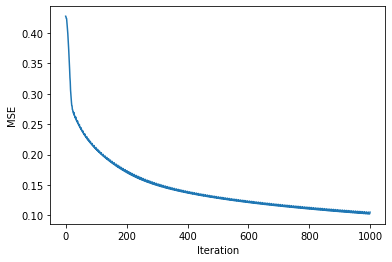

In [26]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')

plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.plot(error)
plt.show()

**When we are building a model, we are making the assumption that our data has two parts, signal and noise. Signal is the real pattern, the repeatable process that we hope to capture and describe. It is the information that we care about. The signal is what lets the model generalize to new situations. The noise is everything else that gets in the way of that.**

## A perfect model describes the signal exactly, and ignores all of the noise.

* If a model fails to capture all of the signal, that type of error is called bias.
* If a model captures of some of the noise, that type of error is called variance.

## Underfitting: too much bias in our model.
## Overfitting: too much variance in our model.

# Noisy pattern

# Noise model from a binomial distribution.

In [27]:
accurray = []
probabilities = np.linspace(0,1,10)
x_rescaled = 2*x_test.copy()-1

In [28]:
x_test.shape

(10000, 785)

In [29]:
for p in probabilities:
  mean = 0
  for i in range(10):
    x_nosie = 2*np.random.binomial(1, (1-p), size=(10000, 785)) - 1
    
    x_noisy_rescaled=(x_rescaled*x_nosie+1)/2
    
    h=1/(1+np.exp(-wh@x_noisy_rescaled.T))  # hidden activation for all pattern
    y=1/(1+np.exp(-wo@h))          # output for all pattern
    y = np.around(y).T
 
    accuracy_i = (y_test == y).astype(np.int)
    mean+=accuracy_i.mean()/10
 
  accurray.append(mean)


# Decreasing model Accuracy with binomial noise.

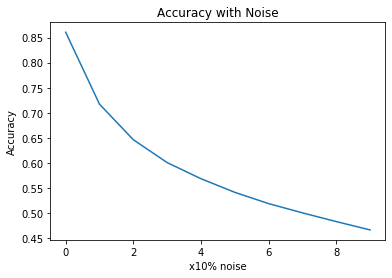

In [30]:
plt.plot(accurray)
plt.title('Accuracy with Noise')
plt.ylabel('Accuracy')
plt.xlabel('x10% noise')
plt.show()

## if we keep on increasing the noise, the training accuracy keeps on decreasing, noise is inversely proportional to the training accuracy.